In [1]:
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

/Users/andi/.local/share/virtualenvs/ImmoSpider-M0SYrQN4/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/andi/.local/share/virtualenvs/ImmoSpider-M0SYrQN4/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('apartments.csv')
len(df)

3303

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3303 entries, 0 to 3302
Data columns (total 22 columns):
address         2758 non-null object
balcony         3303 non-null bool
city            3303 non-null object
contact_name    2631 non-null object
district        3303 non-null object
extra_costs     3303 non-null float64
garden          3303 non-null bool
immo_id         3303 non-null int64
kitchen         3303 non-null bool
lat             2721 non-null float64
lng             2721 non-null float64
media_count     3303 non-null int64
private         3303 non-null bool
rent            3303 non-null float64
rooms           3303 non-null float64
sqm             3303 non-null float64
time_dest       0 non-null float64
time_dest2      0 non-null float64
time_dest3      0 non-null float64
title           3303 non-null object
url             3303 non-null object
zip_code        3303 non-null int64
dtypes: bool(4), float64(9), int64(3), object(6)
memory usage: 477.5+ KB


In [5]:
df.head()

,address,balcony,city,contact_name,district,extra_costs,garden,immo_id,kitchen,lat,...,private,rent,rooms,sqm,time_dest,time_dest2,time_dest3,title,url,zip_code
0,Tino-Schwierzina-Straße 30,False,Berlin,Steffi Kleist,Heinersdorf (Weißensee),150.00,False,98492706,True,52.56096,...,False,465.00,1.0,21.00,NaN,NaN,NaN,Modernes und ruhiges Wohnen für Studenten und ...,https://www.immobilienscout24.de/expose/98492706,13089
1,Fürstenbergerstraße 1,True,Berlin,Bastian Schätzle,Mitte (Mitte),140.00,True,106360706,True,52.53709,...,False,590.00,4.0,15.00,NaN,NaN,NaN,Grand Room // Hochwertiges Co-Living - fully f...,https://www.immobilienscout24.de/expose/106360706,10435
2,Klara Franke Straße 12,True,Berlin,Bastian Schätzle,Tiergarten (Tiergarten),140.00,True,106362652,True,NaN,...,False,590.00,4.0,15.00,NaN,NaN,NaN,Grand Room // Hochwertiges Co-Living - fully f...,https://www.immobilienscout24.de/expose/106362652,10557
3,Otto-Franke-Str. 66,True,Berlin,Vermietungsteam Nipkowstraße,Adlershof (Treptow),139.38,False,102268699,False,52.43390,...,False,760.60,2.0,60.60,NaN,NaN,NaN,Erstmieter einer schönen DG-Wohnung in Adlershof,https://www.immobilienscout24.de/expose/102268699,12489
4,Voßstr. 27,False,Berlin,Franziska Rode,Mitte (Mitte),327.69,True,106379605,True,52.51088,...,False,1310.76,2.0,72.82,NaN,NaN,NaN,Stilvolles 2-Zimmer-Cityapartment mit großzügi...,https://www.immobilienscout24.de/expose/106379605,10117


## Data Cleaning

In [6]:
df.immo_id = df.immo_id.astype(str)
df.zip_code = df.zip_code.astype(str)
df2=df.drop(columns=["time_dest", "time_dest2", "time_dest3"])
df2.describe()

,extra_costs,lat,lng,media_count,rent,rooms,sqm
count,3303.000000,2721.000000,2721.000000,3303.000000,3303.000000,3303.000000,3303.000000
mean,228.565970,52.508997,13.393483,11.640630,1131.125213,2.570666,82.514342
std,145.439447,0.045207,0.103439,7.596072,847.670547,1.151876,45.851243
min,0.000000,52.376040,13.127430,0.000000,176.520000,1.000000,6.000000
25%,140.000000,52.481330,13.330310,7.000000,602.810000,2.000000,55.000000
50%,199.330000,52.510890,13.388810,10.000000,900.000000,2.000000,72.000000
75%,279.000000,52.538840,13.452290,15.000000,1398.500000,3.000000,99.660000
max,1750.000000,52.645320,13.667430,88.000000,15000.000000,11.000000,482.000000


## Interesting statistics
### Providers with most apartment offers

In [7]:
df2.groupby("contact_name").size().sort_values(ascending=False)

contact_name
Engel & Völkers Berlin Mitte                         66
BIDDEX IMMOBILIEN                                    45
Telefonist ADEN Immo                                 42
Bastian Schätzle                                     30
Manuela von Mallinckrodt                             29
Vermietungsteam Stadthaus Verwaltungsgesellschaft    29
Nadin Güner                                          26
Sandy Ecke                                           22
Michael Berndt                                       22
Seraphina Behrens                                    21
Sandra Linke                                         20
Isabelle Weihe                                       19
Jürgen Schmidt                                       19
Ihr Makler in Berlin!                                19
Benjamin Nudelmann                                   19
Jörg-M. Meier                                        18
Nancy  Luftmann / Eastside                           18
Konstanze Mühlbach                 

### Districts with most apartment offers

In [8]:
df2.groupby("district").size().sort_values(ascending=False)

district
Mitte (Mitte)                              319
Friedrichshain (Friedrichshain)            250
Charlottenburg (Charlottenburg)            232
Tiergarten (Tiergarten)                    210
Spandau (Spandau)                          158
Prenzlauer Berg (Prenzlauer Berg)          135
Wedding (Wedding)                          121
Neukölln (Neukölln)                        116
Schöneberg (Schöneberg)                    115
Wilmersdorf (Wilmersdorf)                  112
Kreuzberg (Kreuzberg)                      103
Reinickendorf (Reinickendorf)               84
Hellersdorf (Hellersdorf)                   74
Köpenick (Köpenick)                         74
Lichterfelde (Steglitz)                     63
Weißensee (Weißensee)                       58
Steglitz (Steglitz)                         48
Pankow (Pankow)                             48
Lichtenberg (Lichtenberg)                   46
Britz (Neukölln)                            41
Staaken (Spandau)                           38
Adle

In [9]:
df3=df2[(df2.rent<2000) & (df2.sqm<200)]
len(df3)

2993

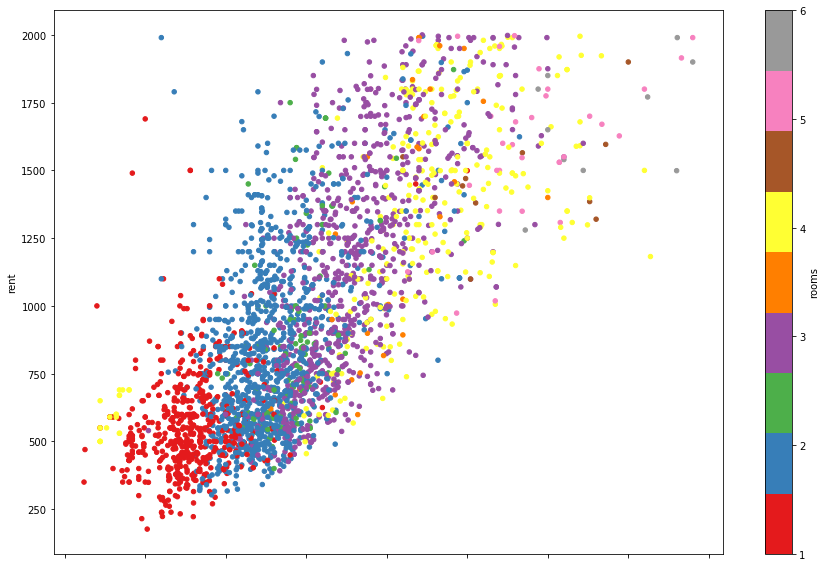

In [10]:
df3.plot(x="sqm", y="rent", c="rooms", kind="scatter", colormap=cm.Set1, figsize=(15,10))

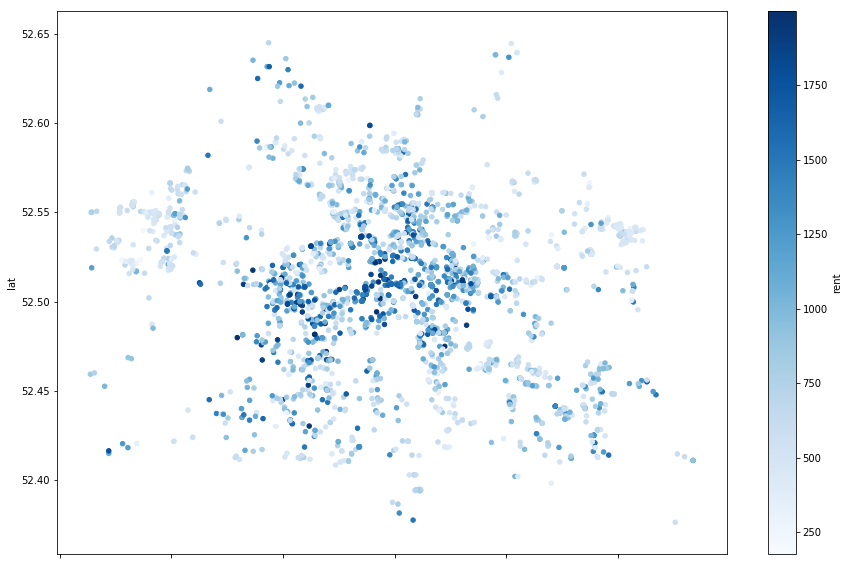

In [11]:
df3.plot(x="lng", y="lat", c="rent", kind="scatter", figsize=(15,10), colormap=cm.Blues)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114e204e0>,
      dtype=object)

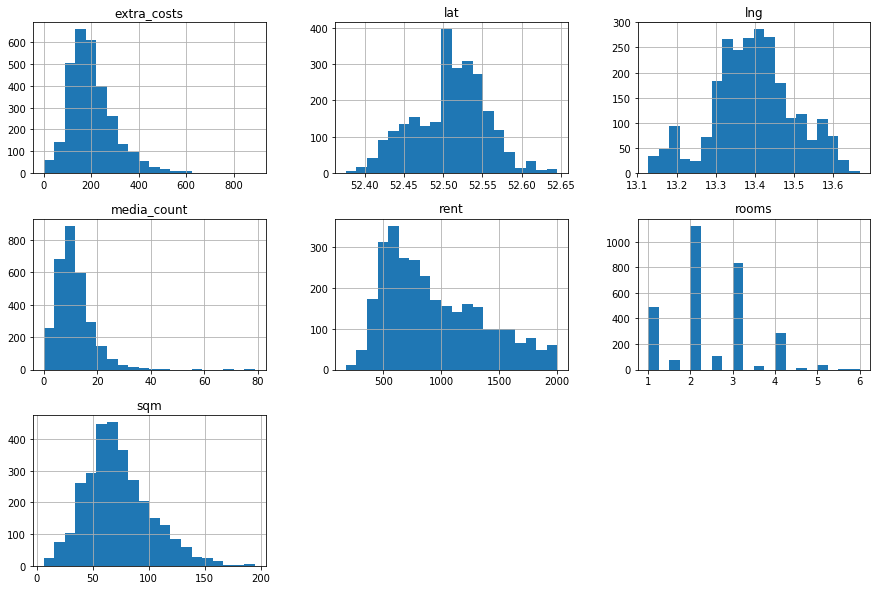

In [12]:
df3.hist(bins=20,figsize=(15,10), column=["extra_costs","lat","lng","media_count","rent","rooms","sqm"])

In [13]:
corr=df3.corr()

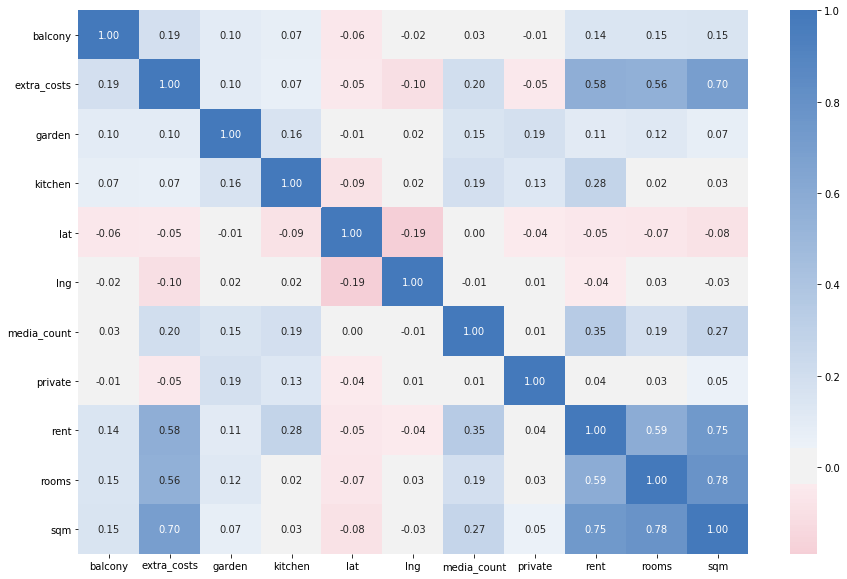

In [14]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, center=0.0, 
            cmap=sns.diverging_palette(5, 250, as_cmap=True), annot=True, fmt=".2f", ax=ax)

/Users/andi/.local/share/virtualenvs/ImmoSpider-M0SYrQN4/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


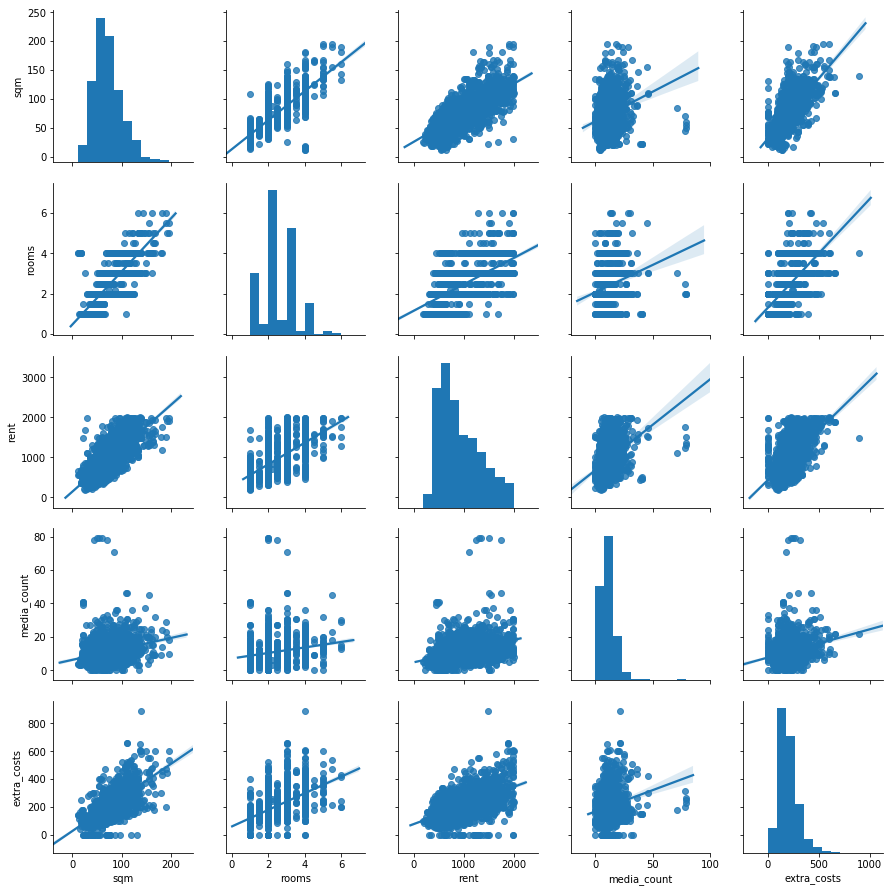

In [15]:
df4=df3.dropna()
sns.pairplot(df4, vars=["sqm","rooms","rent","media_count", "extra_costs"], kind="reg")

In [16]:
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score

In [17]:
# One-hot encoding of zip_codes
hot_zip = pd.get_dummies(df3.zip_code)
df3.balcony = df3.balcony.astype(int)
df3.garden = df3.garden.astype(int)
df3.kitchen = df3.kitchen.astype(int)
df3.private = df3.private.astype(int)

/Users/andi/.local/share/virtualenvs/ImmoSpider-M0SYrQN4/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [18]:
X = pd.concat((df3[["sqm","rooms","balcony","garden","kitchen","private"]], hot_zip), axis=1)
y = df3[["rent"]]

In [19]:
X.head()

,sqm,rooms,balcony,garden,kitchen,private,10115,10117,10119,10178,...,14129,14163,14165,14167,14169,14193,14195,14197,14199,37127
0,21.00,1.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.00,4.0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15.00,4.0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,60.60,2.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,72.82,2.0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# a simple linear model doesn't perform too well
simple = linear_model.LinearRegression()
simple.fit(X,y)
y_pred = simple.predict(X)
r2_score(y, y_pred)

/Users/andi/.local/share/virtualenvs/ImmoSpider-M0SYrQN4/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


0.8182016113735852

In [21]:
# Robustly fit linear model with RANSAC (RANdom SAmple Consensus) algorithm 
regressor = linear_model.RANSACRegressor(linear_model.LinearRegression())

In [22]:
regressor.fit(X,y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=inf, max_trials=100, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [23]:
inlier_mask = regressor.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
print(u'%.1f%% der Wohnungen als Ausreißer identifiziert' % (sum(outlier_mask)*100.0/(sum(outlier_mask)+sum(inlier_mask))))

16.6% der Wohnungen als Ausreißer identifiziert


In [24]:
y_pred = regressor.predict(X)
df3["rent_predicted"] = y_pred

/Users/andi/.local/share/virtualenvs/ImmoSpider-M0SYrQN4/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
r2_ransac = r2_score(y[inlier_mask], y_pred[inlier_mask])

/Users/andi/.local/share/virtualenvs/ImmoSpider-M0SYrQN4/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


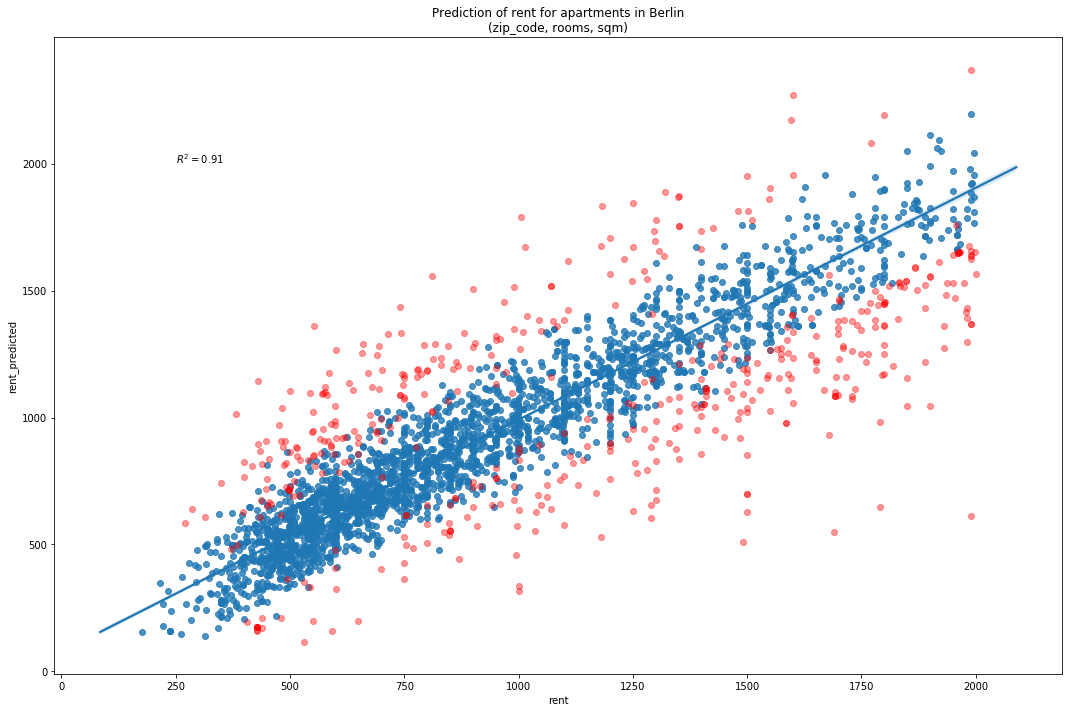

In [45]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.regplot(df3['rent'][inlier_mask],
            df3['rent_predicted'][inlier_mask])
plt.scatter(df3['rent'][outlier_mask],
            df3['rent_predicted'][outlier_mask],
            alpha=0.4,
            c='r')

plt.title('Prediction of rent for apartments in Berlin\n(zip_code, rooms, sqm)')
plt.text(250, 2000, r'$R^2=%.2f$' % r2_ransac)
plt.tight_layout()
# plt.savefig('LinReg-rent-apartment.png', dpi=150)

In [27]:
df3["rent_error"] = df3["rent"] - df3["rent_predicted"]

/Users/andi/.local/share/virtualenvs/ImmoSpider-M0SYrQN4/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
top = df3.sort_values("rent_error")

In [29]:
top[top["district"].str.contains("Zehlendorf")]

,address,balcony,city,contact_name,district,extra_costs,garden,immo_id,kitchen,lat,...,media_count,private,rent,rooms,sqm,title,url,zip_code,rent_predicted,rent_error
1837,NaN,0,Berlin,Philipp Vormeier,Zehlendorf (Zehlendorf),240.00,1,106200307,1,NaN,...,13,1,950.00,4.0,105.00,"Ruhige Wohnung in Berlin, Zehlendorf",https://www.immobilienscout24.de/expose/106200307,14167,1305.954371,-355.954371
2163,Am Rohrgarten 89,1,Berlin,Pamela Wunsch,Nikolassee (Zehlendorf),195.83,0,105941117,1,52.42375,...,4,0,447.57,1.5,49.73,welcher Senior macht mich wieder schön ?,https://www.immobilienscout24.de/expose/105941117,14163,720.064463,-272.494463
2562,Düppelstr. 19,0,Berlin,NaN,Zehlendorf (Zehlendorf),115.00,0,105189965,1,52.43177,...,8,0,570.00,2.0,55.64,Tolle Wohnung in ruhiger Zehlendorf-Lage,https://www.immobilienscout24.de/expose/105189965,14163,779.700050,-209.700050
3062,Albertinenstr. 12,1,Berlin,BITTE NUR PER EMAIL WGW Hausverwaltung GmbH,Zehlendorf (Zehlendorf),350.00,1,96253253,1,52.42364,...,12,0,950.00,3.0,85.00,Tolle 3-Zimmerwohnung mit großem Wohnzimmer,https://www.immobilienscout24.de/expose/96253253,14169,1121.453452,-171.453452
170,Marshallstr. 9,1,Berlin,GmbH PRINTS,Dahlem (Zehlendorf),298.00,0,106296287,0,52.45175,...,7,0,1048.23,3.0,110.00,+NAHE GRUNEWALD+SONNENBALKON+PARKETT+WOHNKÜCHE,https://www.immobilienscout24.de/expose/106296287,14169,1217.194321,-168.964321
2174,Am Rohrgarten 89,0,Berlin,Pamela Wunsch,Nikolassee (Zehlendorf),245.51,0,105925436,0,52.42375,...,5,0,561.15,2.0,62.35,schicke Seniorenwohnung für Ehepaare,https://www.immobilienscout24.de/expose/105925436,14163,729.012621,-167.862621
2443,Hugo Vogel Straße 6,1,Berlin,Achim Emde,Wannsee (Zehlendorf),257.00,0,105518230,1,52.42017,...,13,1,1270.00,4.0,124.80,Ansprechende 4-Zimmer-Wohnung zur Miete in Wan...,https://www.immobilienscout24.de/expose/105518230,14109,1437.746044,-167.746044
3252,NaN,1,Berlin,G. Schmidt,Zehlendorf (Zehlendorf),315.00,1,68925463,1,NaN,...,15,1,910.00,3.0,83.00,3-Zi.-Wohnung mit Terrasse u. Garten in sehr g...,https://www.immobilienscout24.de/expose/68925463,14169,1075.177900,-165.177900
2114,Starkenburger Str. 3,0,Berlin,Yvonne Fuchs,Zehlendorf (Zehlendorf),348.00,0,105996967,0,52.44727,...,2,0,1005.30,3.5,100.53,"++Wir renovieren für Sie: Ansprechende 3,5-Zim...",https://www.immobilienscout24.de/expose/105996967,14163,1138.366149,-133.066149
1174,NaN,1,Berlin,Ralph Wodrich,Wannsee (Zehlendorf),756.00,1,106495039,1,NaN,...,12,0,1628.00,3.0,148.00,WANNSEE : EG-Maisonetten-Wohnung direkt am Kle...,https://www.immobilienscout24.de/expose/106495039,14109,1746.810979,-118.810979


In [30]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.75, test_size=0.25)

In [32]:
tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2, scoring="r2")
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

/Users/andi/.local/share/virtualenvs/ImmoSpider-M0SYrQN4/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/Users/andi/.local/share/virtualenvs/ImmoSpider-M0SYrQN4/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:  33%|███▎      | 40/120 [03:02<02:41,  2.02s/pipeline]

Generation 1 - Current best internal CV score: 0.7943207052319466


Optimization Progress:  52%|█████▏    | 62/120 [13:34<45:00, 46.56s/pipeline]  

Generation 2 - Current best internal CV score: 0.7990795855355823


Optimization Progress:  68%|██████▊   | 82/120 [14:36<01:49,  2.88s/pipeline]

Generation 3 - Current best internal CV score: 0.7990795855355823


Optimization Progress:  86%|████████▌ | 103/120 [20:25<07:00, 24.72s/pipeline]

Generation 4 - Current best internal CV score: 0.7990795855355823


Generation 5 - Current best internal CV score: 0.8047495710650671

Best pipeline: ExtraTreesRegressor(ElasticNetCV(LassoLarsCV(input_matrix, normalize=True), l1_ratio=0.9, tol=0.1), bootstrap=True, max_features=0.1, min_samples_leaf=1, min_samples_split=6, n_estimators=100)
0.8167379403663171


In [39]:
y_pred = tpot.predict(X)

In [40]:
y_pred_test = tpot.predict(X_test)
r2_score(y_test, y_pred_test)

0.8167379403663171

In [42]:
df3["rent_predicted2"] = y_pred
df3["rent_error2"] = df3["rent"] - df3["rent_predicted2"]

/Users/andi/.local/share/virtualenvs/ImmoSpider-M0SYrQN4/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/andi/.local/share/virtualenvs/ImmoSpider-M0SYrQN4/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
top = df3.sort_values("rent_error2")

In [44]:
top[top["district"].str.contains("Zehlendorf")]

,address,balcony,city,contact_name,district,extra_costs,garden,immo_id,kitchen,lat,...,rent,rooms,sqm,title,url,zip_code,rent_predicted,rent_error,rent_predicted2,rent_error2
2443,Hugo Vogel Straße 6,1,Berlin,Achim Emde,Wannsee (Zehlendorf),257.00,0,105518230,1,52.42017,...,1270.00,4.0,124.80,Ansprechende 4-Zimmer-Wohnung zur Miete in Wan...,https://www.immobilienscout24.de/expose/105518230,14109,1437.746044,-167.746044,1570.768511,-300.768511
1837,NaN,0,Berlin,Philipp Vormeier,Zehlendorf (Zehlendorf),240.00,1,106200307,1,NaN,...,950.00,4.0,105.00,"Ruhige Wohnung in Berlin, Zehlendorf",https://www.immobilienscout24.de/expose/106200307,14167,1305.954371,-355.954371,1203.671937,-253.671937
3127,Von-der-Trenck-Straße 3,1,Berlin,Wohnbau Service Bonn GmbH Service Team,Nikolassee (Zehlendorf),182.17,0,90729049,1,52.42164,...,451.83,1.5,56.62,Wohnen in der Natur! WBS erforderlich! Einbauk...,https://www.immobilienscout24.de/expose/90729049,14129,494.993166,-43.163166,682.943452,-231.113452
3062,Albertinenstr. 12,1,Berlin,BITTE NUR PER EMAIL WGW Hausverwaltung GmbH,Zehlendorf (Zehlendorf),350.00,1,96253253,1,52.42364,...,950.00,3.0,85.00,Tolle 3-Zimmerwohnung mit großem Wohnzimmer,https://www.immobilienscout24.de/expose/96253253,14169,1121.453452,-171.453452,1178.522517,-228.522517
3252,NaN,1,Berlin,G. Schmidt,Zehlendorf (Zehlendorf),315.00,1,68925463,1,NaN,...,910.00,3.0,83.00,3-Zi.-Wohnung mit Terrasse u. Garten in sehr g...,https://www.immobilienscout24.de/expose/68925463,14169,1075.177900,-165.177900,1124.910356,-214.910356
2163,Am Rohrgarten 89,1,Berlin,Pamela Wunsch,Nikolassee (Zehlendorf),195.83,0,105941117,1,52.42375,...,447.57,1.5,49.73,welcher Senior macht mich wieder schön ?,https://www.immobilienscout24.de/expose/105941117,14163,720.064463,-272.494463,642.159508,-194.589508
3141,Clayallee 311,1,Berlin,Anne Gärtner,Zehlendorf (Zehlendorf),280.00,0,89349917,1,52.43984,...,1209.60,4.0,108.00,"Zehlendorf, Stadtvilla, DG Maisonette",https://www.immobilienscout24.de/expose/89349917,14169,1297.641490,-88.041490,1338.298591,-128.698591
3146,Von-der-Trenck-Straße 5 A,1,Berlin,Wohnbau Service Bonn GmbH Service Team,Nikolassee (Zehlendorf),195.98,1,89168579,1,52.42141,...,535.02,2.0,67.04,WBS erforderlich!!! ruhige Wohnung mit Garten,https://www.immobilienscout24.de/expose/89168579,14129,652.893966,-117.873966,663.079293,-128.059293
1439,NaN,1,Berlin,Justus Oehler,Zehlendorf (Zehlendorf),150.00,0,106366673,1,NaN,...,700.00,3.0,60.00,Wohnung in der 20er Jahre Bruno-Taut Siedlung ...,https://www.immobilienscout24.de/expose/106366673,14169,787.924484,-87.924484,827.669821,-127.669821
2162,Taylorstr. 9,1,Berlin,Stephanie Schulze,Dahlem (Zehlendorf),320.94,0,105941148,0,52.45632,...,1125.81,5.0,106.50,Familienfreundlich wohnen in ruhiger Lage,https://www.immobilienscout24.de/expose/105941148,14195,1202.846253,-77.036253,1243.057065,-117.247065


In [47]:
top.sort_values("rent_error")

,address,balcony,city,contact_name,district,extra_costs,garden,immo_id,kitchen,lat,...,rent,rooms,sqm,title,url,zip_code,rent_predicted,rent_error,rent_predicted2,rent_error2
2610,Halskestraße 6,0,Berlin,NaN,Steglitz (Steglitz),195.00,1,105100305,1,52.44812,...,552.10,2.5,67.10,Schöne 2 1/2 Zimmerwohnung in Steglitz zu ver...,https://www.immobilienscout24.de/expose/105100305,12167,1360.415055,-808.315055,787.997897,-235.897897
630,Cunostr. 8,1,Berlin,Carolin Vonderau,Schmargendorf (Wilmersdorf),454.60,0,106434812,1,52.47576,...,1006.12,4.0,133.71,Helles Wohnen in großzügiger Wohnung in Schmar...,https://www.immobilienscout24.de/expose/106434812,14199,1788.847224,-782.727224,1389.505738,-383.385738
1367,Albrechtstraße 119,1,Berlin,Felix Kleinsorge,Steglitz (Steglitz),120.00,0,106404646,1,52.45546,...,810.00,3.0,92.00,"Schöne, geräumige drei Zimmer Wohnung in Berli...",https://www.immobilienscout24.de/expose/106404646,12167,1558.998366,-748.998366,1087.795280,-277.795280
2215,Halskestr. 10,0,Berlin,Pamela Wunsch,Steglitz (Steglitz),199.70,0,105896145,0,52.44894,...,430.30,1.5,63.05,rollstuhlgerechte Seniorenwohnung für Schnelle...,https://www.immobilienscout24.de/expose/105896145,12167,1145.476664,-715.176664,544.446201,-114.146201
1392,NaN,0,Berlin,Susann Linke,Tiergarten (Tiergarten),337.00,0,106385962,0,NaN,...,741.69,3.0,91.45,Nur mit WBS! Tolle Lage am Lützowufer/am Landw...,https://www.immobilienscout24.de/expose/106385962,10785,1436.703689,-695.013689,1270.992432,-529.302432
1189,Greifswalderstrasse 200A,1,Berlin,NaN,Prenzlauer Berg (Prenzlauer Berg),457.00,0,106487507,1,52.53405,...,1600.00,4.0,148.00,"Schöne,Sonnige, geräumige vier Zimmer Wohnung ...",https://www.immobilienscout24.de/expose/106487507,10405,2270.419634,-670.419634,1670.614769,-70.614769
2437,Erlenstraße 19,1,Berlin,Torsten Resa,Steglitz (Steglitz),220.00,0,105546687,1,52.45056,...,600.00,1.5,65.00,"Appartement mit Weitblick. 1,5-Zimmer-DG-Wohnu...",https://www.immobilienscout24.de/expose/105546687,12167,1267.071856,-667.071856,1014.436872,-414.436872
416,Birkbuschstraße 31,1,Berlin,NaN,Steglitz (Steglitz),307.00,0,60957128,0,52.44712,...,1014.59,3.0,111.80,Sonnige Maisonettewohnung!,https://www.immobilienscout24.de/expose/60957128,12167,1671.068208,-656.478208,1196.196052,-181.606052
3234,Luckenwalder Straße 70,1,Berlin,"Vermietungsbüro ""Grüne Mitte""",Hellersdorf (Hellersdorf),454.68,0,74225906,0,52.54397,...,1182.16,4.0,181.87,Toller Ausblick auf 2 Etagen mit 2 Balkonen,https://www.immobilienscout24.de/expose/74225906,12629,1831.829832,-649.669832,1322.502375,-140.342375
1193,Albrechtstr. 37,1,Berlin,Vermietungsbüro Wohnung,Steglitz (Steglitz),125.00,0,106486746,0,52.45182,...,382.00,1.0,50.40,Erstbezug nach Sanierung! 1-Zi-WE mit großem S...,https://www.immobilienscout24.de/expose/106486746,12167,1015.048759,-633.048759,475.120790,-93.120790
